## Rebalancing Portfolios

In [3]:
import pandas as pd
import numpy  as np

from tiingo import TiingoClient                       
tiingo = TiingoClient({'api_key':'f10f5d79cf2567b045cc7e9b595a6fec0f5321d2'})

import matplotlib.pyplot as plt                        # Basic plot library.
plt.style.use('ggplot')                                # Make plots look nice.

Get S&P500 [sector ETFs](https://www.sectorspdr.com/sectorspdr/) for technology and consumer staples:

In [4]:
PRICE       = tiingo.get_dataframe(['XLK','XLP'],'2000-01-01', metric_name='adjClose')
PRICE.index = pd.to_datetime(PRICE.index).tz_convert(None)
PRICE[-3:]

,XLK,XLP
2021-03-18,129.721302,65.797993
2021-03-19,129.332108,66.026769
2021-03-22,131.870000,66.720000


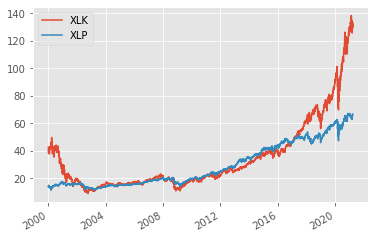

In [5]:
PRICE.plot()

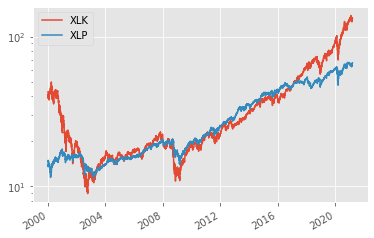

In [7]:
PRICE.plot(logy=True)

Calculate returns:

In [6]:
RET = PRICE.pct_change()
RET

,XLK,XLP
2000-01-03,NaN,NaN
2000-01-04,-0.050685,-0.028132
2000-01-05,0.000570,0.014925
2000-01-06,-0.048044,0.021390
2000-01-07,0.017355,0.063700
...,...,...
2021-03-16,0.007530,0.001204
2021-03-17,-0.000822,-0.001503
2021-03-18,-0.027749,-0.004065
2021-03-19,-0.003000,0.003477


Suppose we form an equal-weight portfolio:

In [9]:
weights = pd.Series({'XLK':0.5, 'XLP':0.5})
weights

XLK    0.5
XLP    0.5
dtype: float64

Calculate portfolio return:

In [10]:
RET * weights

,XLK,XLP
2000-01-03,NaN,NaN
2000-01-04,-0.025343,-0.014066
2000-01-05,0.000285,0.007463
2000-01-06,-0.024022,0.010695
2000-01-07,0.008677,0.031850
...,...,...
2021-03-16,0.003765,0.000602
2021-03-17,-0.000411,-0.000752
2021-03-18,-0.013874,-0.002033
2021-03-19,-0.001500,0.001738


In [15]:
r_equal_weight = (RET * weights).sum('columns') #sum the rows instead of the columns
r_equal_weight

2000-01-03    0.000000
2000-01-04   -0.039409
2000-01-05    0.007748
2000-01-06   -0.013327
2000-01-07    0.040527
                ...   
2021-03-16    0.004367
2021-03-17   -0.001163
2021-03-18   -0.015907
2021-03-19    0.000238
2021-03-22    0.015061
Length: 5338, dtype: float64

Merge the return tables and the portfolio return and plot them together:

In [20]:
RET.join(r_equal_weight.rename('Equal_Weight')).add(1).cumprod()

,XLK,XLP,Equal_Weight
2000-01-03,NaN,NaN,1.000000
2000-01-04,0.949315,0.971868,0.960591
2000-01-05,0.949856,0.986374,0.968034
2000-01-06,0.904221,1.007473,0.955133
2000-01-07,0.919913,1.071648,0.993842
...,...,...,...
2021-03-16,3.128862,4.766872,4.426258
2021-03-17,3.126290,4.759705,4.421112
2021-03-18,3.039539,4.740357,4.350786
2021-03-19,3.030420,4.756839,4.351823


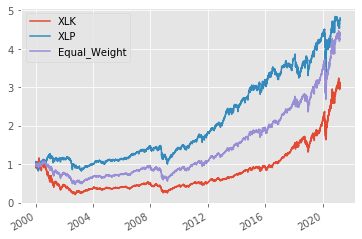

In [21]:
RET.join(r_equal_weight.rename('Equal_Weight')).add(1).cumprod().plot()

Calculate compound returns for each asset:

In [27]:
cum_ret = RET[1:].add(1).cumprod()
cum_ret

,XLK,XLP
2000-01-04,0.949315,0.971868
2000-01-05,0.949856,0.986374
2000-01-06,0.904221,1.007473
2000-01-07,0.919913,1.071648
2000-01-10,0.954906,1.047473
...,...,...
2021-03-16,3.128862,4.766872
2021-03-17,3.126290,4.759705
2021-03-18,3.039539,4.740357
2021-03-19,3.030420,4.756839


Weight the compound returns:

In [28]:
(cum_ret * weights).sum('columns')

2000-01-04    0.960591
2000-01-05    0.968115
2000-01-06    0.955847
2000-01-07    0.995781
2000-01-10    1.001189
                ...   
2021-03-16    3.947867
2021-03-17    3.942998
2021-03-18    3.889948
2021-03-19    3.893630
2021-03-22    3.948334
Length: 5337, dtype: float64

Plot the compound returns and the weighted compound return:

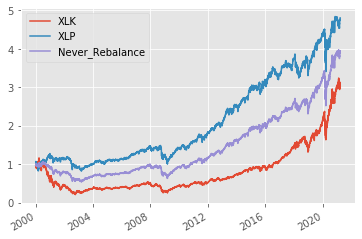

In [30]:
cum_ret.join((cum_ret * weights).sum('columns').rename('Never_Rebalance')).plot()

### Rebalance Dates

We form the initial portfolio on the first date:

In [32]:
PRICE[:1].index

DatetimeIndex(['2000-01-03'], dtype='datetime64[ns]', freq=None)

Now suppose we rebalance at the end of each month.
Get the last trading date of each month:

In [47]:
PRICE.groupby([PRICE.index.year,PRICE.index.month]).tail(1).index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31',
               ...
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-30', '2020-11-30', '2020-12-31', '2021-01-29',
               '2021-02-26', '2021-03-22'],
              dtype='datetime64[ns]', length=255, freq=None)

Now combine the first portfolio formation date with all the rebalance dates:

In [48]:
PRICE[:1].index.union(PRICE.groupby([PRICE.index.year,PRICE.index.month]).tail(1).index)

DatetimeIndex(['2000-01-03', '2000-01-31', '2000-02-29', '2000-03-31',
               '2000-04-28', '2000-05-31', '2000-06-30', '2000-07-31',
               '2000-08-31', '2000-09-29',
               ...
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-30', '2020-11-30', '2020-12-31', '2021-01-29',
               '2021-02-26', '2021-03-22'],
              dtype='datetime64[ns]', length=256, freq=None)

Same for quarterly rebalance dates:

In [50]:
PRICE[:1].index.union(PRICE.groupby([PRICE.index.year,PRICE.index.quarter]).tail(1).index)

DatetimeIndex(['2000-01-03', '2000-03-31', '2000-06-30', '2000-09-29',
               '2000-12-29', '2001-03-30', '2001-06-29', '2001-09-28',
               '2001-12-31', '2002-03-28', '2002-06-28', '2002-09-30',
               '2002-12-31', '2003-03-31', '2003-06-30', '2003-09-30',
               '2003-12-31', '2004-03-31', '2004-06-30', '2004-09-30',
               '2004-12-31', '2005-03-31', '2005-06-30', '2005-09-30',
               '2005-12-30', '2006-03-31', '2006-06-30', '2006-09-29',
               '2006-12-29', '2007-03-30', '2007-06-29', '2007-09-28',
               '2007-12-31', '2008-03-31', '2008-06-30', '2008-09-30',
               '2008-12-31', '2009-03-31', '2009-06-30', '2009-09-30',
               '2009-12-31', '2010-03-31', '2010-06-30', '2010-09-30',
               '2010-12-31', '2011-03-31', '2011-06-30', '2011-09-30',
               '2011-12-30', '2012-03-30', '2012-06-29', '2012-09-28',
               '2012-12-31', '2013-03-28', '2013-06-28', '2013-09-30',
      

Define a function to get rebalance dates:

In [54]:
def get_rebalance_dates(frequency):
    return PRICE[:1].index.union(PRICE.groupby([PRICE.index.year,PRICE.index.quarter]).tail(1).index)

get_rebalance_dates('month')

DatetimeIndex(['2000-01-03', '2000-03-31', '2000-06-30', '2000-09-29',
               '2000-12-29', '2001-03-30', '2001-06-29', '2001-09-28',
               '2001-12-31', '2002-03-28', '2002-06-28', '2002-09-30',
               '2002-12-31', '2003-03-31', '2003-06-30', '2003-09-30',
               '2003-12-31', '2004-03-31', '2004-06-30', '2004-09-30',
               '2004-12-31', '2005-03-31', '2005-06-30', '2005-09-30',
               '2005-12-30', '2006-03-31', '2006-06-30', '2006-09-29',
               '2006-12-29', '2007-03-30', '2007-06-29', '2007-09-28',
               '2007-12-31', '2008-03-31', '2008-06-30', '2008-09-30',
               '2008-12-31', '2009-03-31', '2009-06-30', '2009-09-30',
               '2009-12-31', '2010-03-31', '2010-06-30', '2010-09-30',
               '2010-12-31', '2011-03-31', '2011-06-30', '2011-09-30',
               '2011-12-30', '2012-03-30', '2012-06-29', '2012-09-28',
               '2012-12-31', '2013-03-28', '2013-06-28', '2013-09-30',
      

In [55]:
def get_rebalance_dates(frequency):
    return PRICE[:1].index.union(PRICE.groupby([PRICE.index.year,PRICE.index.frequency]).tail(1).index)

get_rebalance_dates('month')

AttributeError: 'DatetimeIndex' object has no attribute 'frequency'

In [56]:
frequency = 'month'

getattr(PRICE.index, frequency)

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', length=5338)

In [61]:
def get_rebalance_dates(frequency):
    return PRICE[:1].index.union(PRICE.groupby([PRICE.index.year, getattr(PRICE.index,frequency)]).tail(1).index)

get_rebalance_dates('month')

DatetimeIndex(['2000-01-03', '2000-01-31', '2000-02-29', '2000-03-31',
               '2000-04-28', '2000-05-31', '2000-06-30', '2000-07-31',
               '2000-08-31', '2000-09-29',
               ...
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-30', '2020-11-30', '2020-12-31', '2021-01-29',
               '2021-02-26', '2021-03-22'],
              dtype='datetime64[ns]', length=256, freq=None)

In [62]:
get_rebalance_dates('month')

DatetimeIndex(['2000-01-03', '2000-01-31', '2000-02-29', '2000-03-31',
               '2000-04-28', '2000-05-31', '2000-06-30', '2000-07-31',
               '2000-08-31', '2000-09-29',
               ...
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-30', '2020-11-30', '2020-12-31', '2021-01-29',
               '2021-02-26', '2021-03-22'],
              dtype='datetime64[ns]', length=256, freq=None)

In [63]:
get_rebalance_dates('year')

DatetimeIndex(['2000-01-03', '2000-12-29', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-30', '2006-12-29',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-30', '2017-12-29', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-03-22'],
              dtype='datetime64[ns]', freq=None)

### Rebalance Loop

Suppose we rebalance at the end of each month:

In [64]:
frequency = 'month'

rebalance_dates = get_rebalance_dates(frequency) 

weights = pd.Series({'XLK':1/2, 'XLP':1/2})

Our portfolio value equals $1 on the first trading date:

In [ ]:
portfolio_value = pd.Series(1, index=[rebalance_dates[0]])
portfolio_value

First holding period:

In [ ]:
start_date = 
end_date   = 

print('start:', start_date, 'end:', end_date)

Compound return of the assets during this holding period:

In [ ]:
cum_ret = 
cum_ret

At the start of each period, our current portfolio value equals the most recent value of the last period:

In [ ]:
portfolio_value.iloc[-1]

Dollar amounts we invest in these 2 assets at the start of the current holding period:

In [ ]:
new_positions = portfolio_value.iloc[-1] * weights 
new_positions

Dollar amounts we have in these two assets during the current holding period:

In [ ]:
start_to_end_positions = 
start_to_end_positions

Total portfolio value during the current holding period:

Now append these values to the previous portfolio value:

In [ ]:
portfolio_value = portfolio_value.append(  )  
portfolio_value

And now repeat this procedure for the next holding period:

In [ ]:
start_date = rebalance_dates[]
end_date   = rebalance_dates[]

print('start:', start_date, 'end:', end_date)

In [ ]:
new_positions = portfolio_value.iloc[-1] * weights   # initial dollar investments
new_positions

In [ ]:
cum_ret = RET[start_date:end_date][1:].add(1).cumprod()

start_to_end_positions = new_positions  * cum_ret
start_to_end_positions

Sum the positions and append them to the portfolio value:

In [ ]:
portfolio_value = portfolio_value.append( start_to_end_positions.sum('columns') )  
portfolio_value

And now loop over all realance dates:

In [ ]:
def run_backtest(frequency):
    rebalance_dates = get_rebalance_dates(frequency)    
    weights = pd.Series({'XLK':1/2, 'XLP':1/2})
    portfolio_value = pd.Series(1,index=[rebalance_dates[0]])

    for i in range(len(rebalance_dates)-1):
        
        
        
    return portfolio_value


